In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install -q transformers datasets soundfile speechbrain accelerate huggingface_hub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 kB 13.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 39.2 MB/s eta 0:00:00


In [2]:
!pip install tqdm

In [3]:
from huggingface_hub import notebook_login

notebook_login()


In [4]:
from datasets import load_dataset, Audio

dataset = load_dataset("facebook/voxpopuli", "fr", split="train")
len(dataset)

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

voxpopuli.py:   0%|          | 0.00/8.84k [00:00<?, ?B/s]

The repository for facebook/voxpopuli contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/facebook/voxpopuli.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


data/n_files.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

asr_train.tsv:   0%|          | 0.00/31.0M [00:00<?, ?B/s]

asr_dev.tsv:   0%|          | 0.00/739k [00:00<?, ?B/s]

asr_test.tsv:   0%|          | 0.00/727k [00:00<?, ?B/s]

train_part_0.tar.gz:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

train_part_1.tar.gz:   0%|          | 0.00/1.70G [00:00<?, ?B/s]

train_part_2.tar.gz:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

train_part_3.tar.gz:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

train_part_4.tar.gz:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

train_part_5.tar.gz:   0%|          | 0.00/1.75G [00:00<?, ?B/s]

train_part_6.tar.gz:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

train_part_7.tar.gz:   0%|          | 0.00/1.70G [00:00<?, ?B/s]

train_part_8.tar.gz:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

train_part_9.tar.gz:   0%|          | 0.00/1.76G [00:00<?, ?B/s]

train_part_10.tar.gz:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

train_part_11.tar.gz:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

train_part_12.tar.gz:   0%|          | 0.00/1.75G [00:00<?, ?B/s]

train_part_13.tar.gz:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

train_part_14.tar.gz:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

dev_part_0.tar.gz:   0%|          | 0.00/605M [00:00<?, ?B/s]

test_part_0.tar.gz:   0%|          | 0.00/605M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

73561

In [5]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))

In [6]:
from transformers import SpeechT5Processor

checkpoint = "microsoft/speecht5_tts"
processor = SpeechT5Processor.from_pretrained(checkpoint)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

In [7]:
tokenizer = processor.tokenizer

In [8]:
dataset[0]

{'audio_id': '20200212-0900-PLENARY-fr_20200212-18:11:25_1',
 'language': 2,
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/c65191f3ea8bb55b8f233915dbb3bd232bda704e9fb9b1b3b78a87c2e35d6b4f/train_part_0/20200212-0900-PLENARY-fr_20200212-18:11:25_1.wav',
  'array': array([ 3.66210938e-04, -9.15527344e-05, -2.74658203e-04, ...,
         -6.40869141e-04, -7.93457031e-04, -9.15527344e-04]),
  'sampling_rate': 16000},
 'raw_text': 'Notre délégation défendra la lutte contre les écarts salariaux à travail égal, contre les cyberviolences, les mariages forcés et les mutilations génitales.',
 'normalized_text': 'notre délégation défendra la lutte contre les écarts salariaux à travail égal contre les cyberviolences les mariages forcés et les mutilations génitales.',
 'gender': 'female',
 'speaker_id': '182995',
 'is_gold_transcript': True,
 'accent': 'None'}

In [9]:
def extract_all_chars(batch):
    all_text = " ".join(batch["normalized_text"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}


vocabs = dataset.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=dataset.column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k, _ in tokenizer.get_vocab().items()}

Map:   0%|          | 0/73561 [00:00<?, ? examples/s]

In [10]:
dataset_vocab - tokenizer_vocab

{' ', 'à', 'â', 'ç', 'è', 'ë', 'î', 'ï', 'ô', 'ù', 'û', 'ü'}

In [12]:
replacements = [
    ("à", "a"),
    ("â" , "a"),
    ("ç", "c"),
    ("è", "e"),
    ("ë", "e"),
    ("î", "i"),
    ("ï", "i"),
    ("ô", "o"),
    ("ù","u"),
    ("û","u"),
    ("ü", "u"),
]


def cleanup_text(inputs):
    for src, dst in replacements:
        inputs["normalized_text"] = inputs["normalized_text"].replace(src, dst)
    return inputs


dataset = dataset.map(cleanup_text)

Map:   0%|          | 0/73561 [00:00<?, ? examples/s]

In [13]:
from collections import defaultdict

speaker_counts = defaultdict(int)

for speaker_id in dataset["speaker_id"]:
    speaker_counts[speaker_id] += 1

In [14]:
len(set(dataset["speaker_id"]))

243

In [15]:
len(dataset)

73561

In [16]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name),
)


def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

<ipython-input-16-f28baad2ea60>:3: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import EncoderClassifier


hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)


embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/checkpoints.py:200: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=device

In [17]:
def prepare_dataset(example):
    audio = example["audio"]

    example = processor(
        text=example["normalized_text"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example

In [18]:
processed_example = prepare_dataset(dataset[0])
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

In [19]:
processed_example["speaker_embeddings"].shape

(512,)

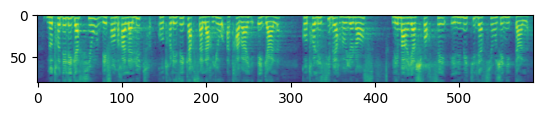

In [20]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

In [21]:
dataset = dataset.map(prepare_dataset, remove_columns=dataset.column_names)

Map:   0%|          | 0/73561 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (688 > 600). Running this sequence through the model will result in indexing errors


In [22]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200


dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])
len(dataset)

Filter:   0%|          | 0/73561 [00:00<?, ? examples/s]

49548

In [23]:
dataset = dataset.train_test_split(test_size=0.1)

In [24]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union


@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(
        self, features: List[Dict[str, Union[List[int], torch.Tensor]]]
    ) -> Dict[str, torch.Tensor]:
        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids, labels=label_features, return_tensors="pt"
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor(
                [len(feature["input_values"]) for feature in label_features]
            )
            target_lengths = target_lengths.new(
                [
                    length - length % model.config.reduction_factor
                    for length in target_lengths
                ]
            )
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [25]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

In [26]:
from transformers import SpeechT5ForTextToSpeech

model = SpeechT5ForTextToSpeech.from_pretrained(checkpoint)

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

In [27]:
from functools import partial

# disable cache during training since it's incompatible with gradient checkpointing
model.config.use_cache = False

# set language and task for generation and re-enable cache
model.generate = partial(model.generate, use_cache=True)

In [28]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="speecht5_finetuned_voxpopuli_fr",  # change to a repo name of your choice
    per_device_train_batch_size=4,
    gradient_accumulation_steps=8,
    learning_rate=1e-5,
    warmup_steps=500,
    max_steps=4000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=2,
    save_steps=1000,
    eval_steps=1000,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [29]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor,
)

<ipython-input-29-3e9fd9c3f140>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [30]:
trainer.train()

Step,Training Loss,Validation Loss
1000,0.528300,0.481901
2000,0.502000,0.467488
3000,0.497200,0.461063
4000,0.500600,0.459270


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:2817: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 1876}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=4000, training_loss=0.5287776968479156, metrics={'train_runtime': 10380.1997, 'train_samples_per_second': 12.331, 'train_steps_per_second': 0.385, 'total_flos': 1.825461076651344e+16, 'train_loss': 0.5287776968479156, 'epoch': 2.8711095165485694})

In [31]:
trainer.push_to_hub()

CommitInfo(commit_url='https://huggingface.co/hp1318/speecht5_finetuned_voxpopuli_fr/commit/8494324983f8bbe371846cdad946ed454ceced3d', commit_message='End of training', commit_description='', oid='8494324983f8bbe371846cdad946ed454ceced3d', pr_url=None, repo_url=RepoUrl('https://huggingface.co/hp1318/speecht5_finetuned_voxpopuli_fr', endpoint='https://huggingface.co', repo_type='model', repo_id='hp1318/speecht5_finetuned_voxpopuli_fr'), pr_revision=None, pr_num=None)